# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn

In [6]:
from sklearn.datasets import load_boston 
boston = load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Создайте датафреймы X и y из этих данных.

In [8]:
X = pd.DataFrame(boston.data, columns = boston.feature_names) 
y = boston.target

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

Масштабируйте данные с помощью StandardScaler.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) 
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [22]:
X_train.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [23]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.842585e-16,5.056461e-17,3.074548e-15,-5.056461e-17,-5.221483e-15,-4.031016e-15,-1.001124e-15,-3.176777e-16,-3.654942e-17,-1.534457e-16,2.005876e-14,5.754473e-15,-1.853578e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,3.645893e-01,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227e+00,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.


In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42) 
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [28]:
X_train_tsne.shape, X_train_scaled.shape

((404, 2), (404, 13))

Постройте диаграмму рассеяния на этих данных.


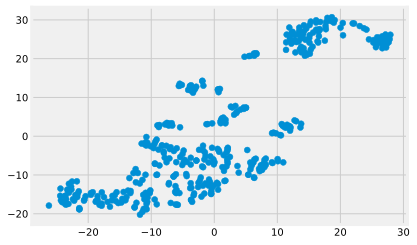

In [29]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]) 
plt.show()

## Задание 2


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42) 
labels_train = kmeans.fit_predict(X_train_scaled)

In [32]:
labels_train.shape

(404,)

In [35]:
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


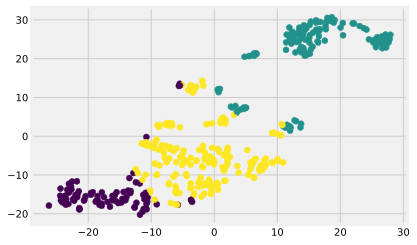

In [33]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [36]:
#price
print(y_train[labels_train == 0].mean())
print(y_train[labels_train == 1].mean())
print(y_train[labels_train == 2].mean())

27.78837209302326
16.165354330708663
24.958115183246072


In [38]:
#CRIM
print(X_train.loc[labels_train == 0, 'CRIM'].mean())
print(X_train.loc[labels_train == 1, 'CRIM'].mean())
print(X_train.loc[labels_train == 2, 'CRIM'].mean())

0.07356558139534886
10.797028425196853
0.42166020942408367


## * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.


In [43]:
labels_test = kmeans.predict(X_test_scaled)

In [44]:
labels_test

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2], dtype=int32)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [45]:
#price
print(y_test[labels_test == 0].mean())
print(y_test[labels_test == 1].mean())
print(y_test[labels_test == 2].mean())

31.35
16.43714285714286
21.860784313725492


In [46]:
#CRIM
print(X_test.loc[labels_test == 0, 'CRIM'].mean())
print(X_test.loc[labels_test == 1, 'CRIM'].mean())
print(X_test.loc[labels_test == 2, 'CRIM'].mean())

0.062060000000000004
10.165531142857143
0.26607882352941176
